# Customer Churn Prediction for SyriaTel

### Overview

SyriaTel, a leading telecommunications provider, faces the challenge of customer churn—when users stop using their services. High churn negatively impacts revenue and increases customer acquisition costs. To remain competitive, it's essential for SyriaTel to identify customers who are at risk of leaving and take proactive steps to retain them.

## Business Understanding

Customer retention is a critical concern in the highly competitive telecommunications industry. For SyriaTel, losing customers to competitors not only results in immediate revenue loss but also increases the cost of acquiring new users to replace them. Since attracting new customers is often more expensive than retaining existing ones, improving customer loyalty directly enhances profitability and business sustainability.

The primary challenge is that customer churn is not always easy to predict using intuition alone. Customers may leave due to various reasons such as high service costs, poor network quality, dissatisfaction with customer service, or more attractive offers from competitors. These decisions often follow patterns in customer behavior that, if identified early, can allow the company to intervene proactively.

## Stakeholders

1. Customer Retention Team : Identify at-risk customers and implement personalized retention strategies.

2. Marketing Department : Design and execute targeted campaigns to improve customer engagement and satisfaction.

3. Customer Service Team : Improve customer experience by resolving issues early.

4. Product & Network Teams :Improve service quality, features, and coverage to enhance customer satisfaction.

5. Executive Leadership : Monitor churn trends, customer lifetime value, and ROI on retention efforts.



## Data Understanding

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score 

In [44]:
bigml_data = pd.read_csv ("bigml_data.csv")
bigml_data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [45]:
#bigml_data.drop(columns=["phone number","state","area code"])
# Clean column names
bigml_data.columns = bigml_data.columns.str.strip()

In [46]:
# Drop the columns
bigml_data = bigml_data.drop(columns=["phone number", "state", "area code"])

In [47]:
bigml_data.isnull().sum()


account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [48]:
print(bigml_data.columns)


Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')


In [49]:
#  check if churn is a minority class
bigml_data['churn'].value_counts(normalize=True)


False    0.855086
True     0.144914
Name: churn, dtype: float64

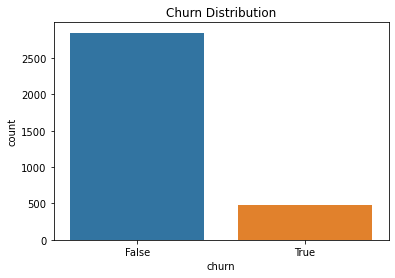

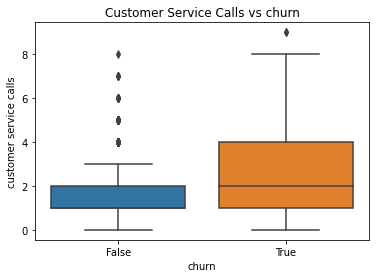

In [50]:
# Class distribution
sns.countplot(x='churn', data= bigml_data)
plt.title('Churn Distribution')
plt.show()

# Compare churn vs customer service calls
sns.boxplot(x='churn', y='customer service calls', data= bigml_data)
plt.title('Customer Service Calls vs churn')
plt.show()

In [51]:
# checking correlation and multicollinearity
bigml_data.corr()


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
number vmail messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493
total night calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.006141


Text(0.5, 1.0, 'Correlation Matrix')

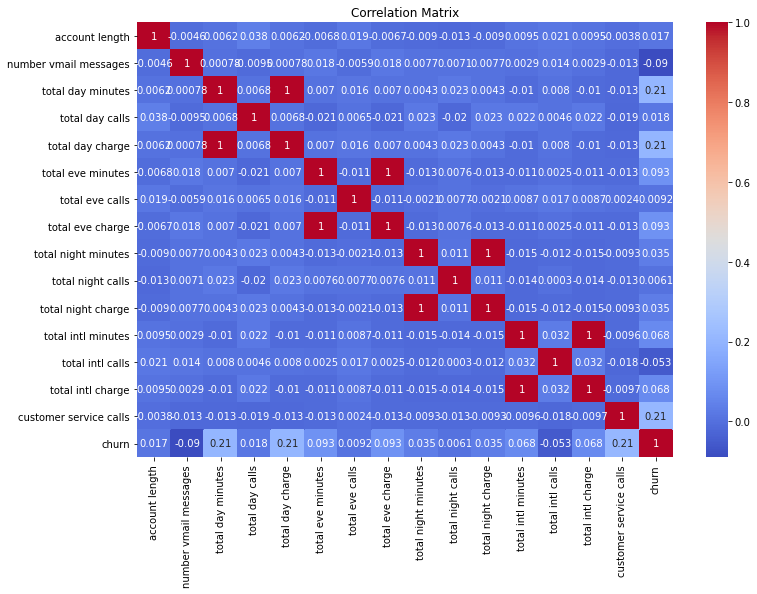

In [52]:

# Convert churn to binary first
bigml_data['churn'] = bigml_data['churn'].astype(int)
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(bigml_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
#plt.show()

### Graph Interpretation
Strong correlation between total day minutes and total day charge

Strong correlation between total night minutes and total night charge

Strong correlation between total eve minutes and total eve charge

Customers who call customer service more often are more likely to churn.

Higher usage (especially during the day) correlates with churn.

More voicemail messages is negatively correlated, perhaps indicating more engagement and lower churn.


<AxesSubplot:xlabel='churn', ylabel='account length'>

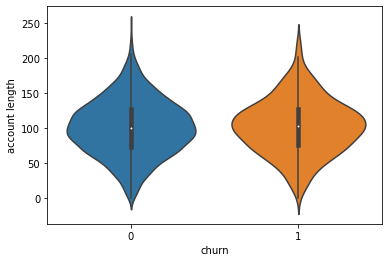

In [53]:
sns.violinplot(x='churn', y='account length', data=bigml_data)

## Data Cleaning

In [54]:
print(bigml_data.dtypes)

account length              int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object


In [55]:
# Checking categorical Values
categorical_cols = bigml_data.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['international plan', 'voice mail plan']


In [56]:
# Keep Churn column out if it's in the object columns
# categorical_cols = [col for col in categorical_cols if col != 'Churn']


In [57]:
# Map 'yes' to 1 and 'no' to 0 in the specified columns
bigml_data[['international plan', 'voice mail plan']] = bigml_data[['international plan', 'voice mail plan']].applymap(lambda x: 1 if x == 'yes' else 0)

In [58]:
bigml_data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [59]:
# One-hot encode
bigml_data = pd.get_dummies(bigml_data, columns=categorical_cols, drop_first=True)
print(bigml_data)

      account length  number vmail messages  total day minutes  \
0                128                     25              265.1   
1                107                     26              161.6   
2                137                      0              243.4   
3                 84                      0              299.4   
4                 75                      0              166.7   
...              ...                    ...                ...   
3328             192                     36              156.2   
3329              68                      0              231.1   
3330              28                      0              180.8   
3331             184                      0              213.8   
3332              74                     25              234.4   

      total day calls  total day charge  total eve minutes  total eve calls  \
0                 110             45.07              197.4               99   
1                 123             27.47          

In [60]:
bigml_data.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_1,voice mail plan_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


In [61]:
print(bigml_data.dtypes)

account length              int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
international plan_1        uint8
voice mail plan_1           uint8
dtype: object


## Modelling

# Logistic Regression

### Scaling Numerical Features

In [62]:
# Step 1: Separate features and target
X = bigml_data.drop('churn', axis=1)     # Replace 'churn' with your target column
y = bigml_data['churn']

In [63]:
# Step 2: Split the data (before scaling or encoding)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [64]:
# Step 3: Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns


In [65]:
# Step 4: Scale numerical columns (only on training set)
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]), columns=numerical_cols, index=X_train.index)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test[numerical_cols]), columns=numerical_cols, index=X_test.index)


In [66]:
# Step 5: Leave categorical features untouched (for now)
X_train_cat = X_train[categorical_cols]
X_test_cat = X_test[categorical_cols]

In [67]:
# Step 6: Combine scaled numerical and untouched categorical columns
X_train_processed = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
X_test_processed = pd.concat([X_test_num_scaled, X_test_cat], axis=1)

In [68]:
# Align columns
X_train_processed, X_test_processed = X_train_processed.align(X_test_processed, join='left', axis=1, fill_value=0)

In [69]:
# 8. Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

print("Original training set shape:", y_train.value_counts().to_dict())
print("Balanced training set shape:", pd.Series(y_train_balanced).value_counts().to_dict())

Original training set shape: {0: 2280, 1: 386}
Balanced training set shape: {1: 2280, 0: 2280}


In [70]:
# Check original class distribution
print("Original class distribution:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check new distribution
print("Balanced class distribution:", Counter(y_train_balanced))

Original class distribution: Counter({0: 2280, 1: 386})
Balanced class distribution: Counter({0: 2280, 1: 2280})


bigml_data_encoded.isnull().sum()

In [71]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (2666, 17)
y_train shape: (2666,)


In [72]:
# Initialize the model
logreg_balanced = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_balanced.fit(X_train, y_train)

c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [73]:
# make prediction
y_pred = logreg_balanced.predict(X_test)

# Evaluation of the model

Accuracy

In [74]:

# Overall correctness of prediction
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8620689655172413


ROC-AUC curve

In [75]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

ROC-AUC Score: 0.6070446735395189


ROC AUC Score: 0.8159522517634292


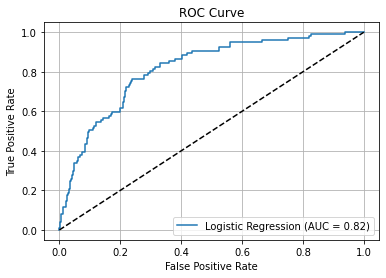

In [76]:
# Predict probabilities instead of class labels
y_probs = logreg_balanced.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()

Confusion Matrix

In [77]:
print(confusion_matrix(y_test, y_pred))

[[551  19]
 [ 73  24]]


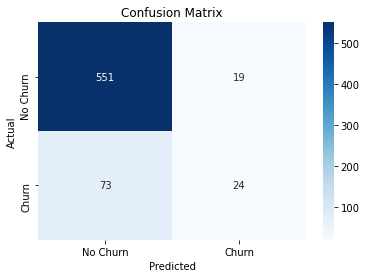

In [78]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [79]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       570
           1       0.56      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.72      0.61      0.63       667
weighted avg       0.84      0.86      0.84       667



### Key Insights from Logistic Regression Model

High accuracy of 86% — overall good at classifying the dominant class (No Churn)

Very high recall for class 0 of 97% — almost never mislabels loyal customers

Interpretable coefficients — you can analyze which features increase or reduce churn risk linearly

Very low recall for churners (0.25) — misses 75% of customers who actually churned

Poor F1-score (0.34) for class 1 — weak balance between false positives and false negatives

The features and churn pattern might not follow a linear relationship, which logistic regression depends on

Logistic regression is too conservative — it prefers to avoid false positives, even if it means missing actual churners

Useful for understanding general trends but not reliable for churn prediction by itself.

## Decision Trees Model

In [80]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [83]:
# Initialize the DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)

# Set up grid search
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Get best model
best_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [84]:
# Predict
y_pred_best = best_tree.predict(X_test)
y_probs_best = best_tree.predict_proba(X_test)[:, 1]


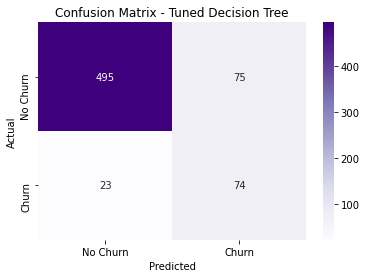

In [86]:
# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

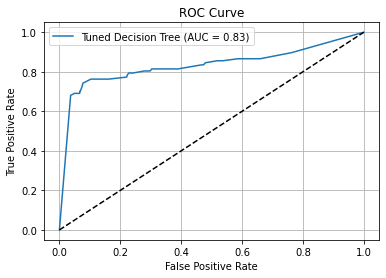

In [87]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs_best)
roc_auc = roc_auc_score(y_test, y_probs_best)

plt.plot(fpr, tpr, label=f'Tuned Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [88]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       570
           1       0.50      0.76      0.60        97

    accuracy                           0.85       667
   macro avg       0.73      0.82      0.76       667
weighted avg       0.89      0.85      0.87       667



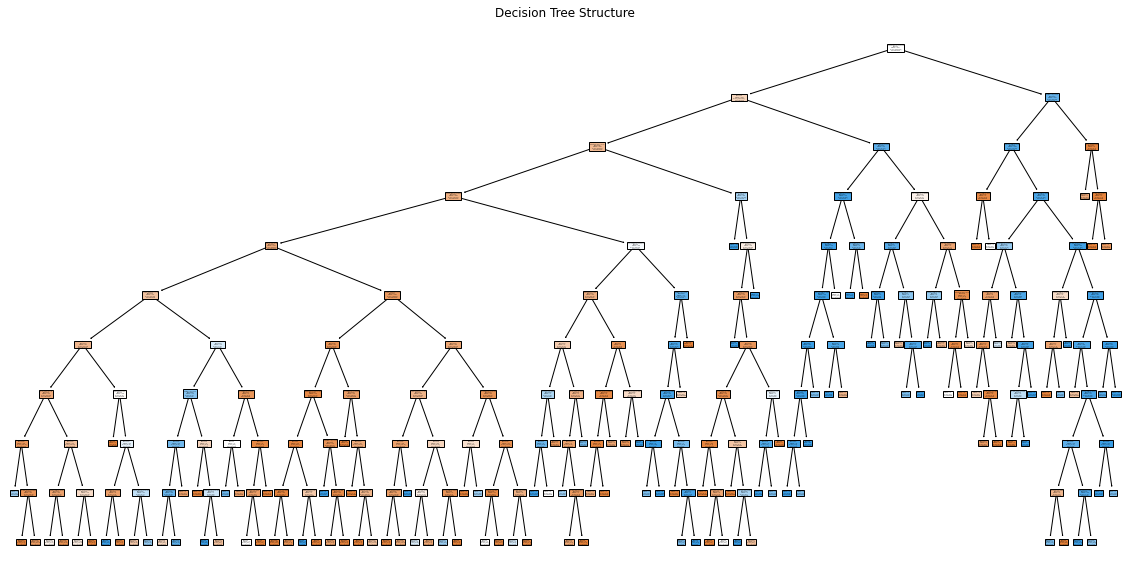

In [89]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=X_train.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.title("Decision Tree Structure")
plt.show()

### key insights from Decision Trees

Much higher recall for churners (76%) — captures the majority of customers who churn

Balanced performance: F1-score for class 1 is 0.60, much better than logistic regression

Captures nonlinear interactions like if customers have both an international plan and high service calls, they churn

Better weighted and macro F1-scores — shows more balanced performance across classes

Slightly lower accuracy than Logistic Regression (85% vs 86%)

More prone to overfitting without proper pruning or depth control

Less interpretable than logistic regression (but still explainable with tree diagrams and feature importance)

Churn behavior is influenced by complex interactions like support call frequency, plan type, total charges

Tree-based models can adapt to patterns logistic regression misses

This model gives you better practical value — it finds more of the customers you're at risk of losing



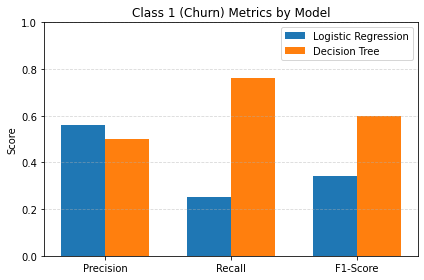

In [90]:
# Metrics from your reports
metrics = ['Precision', 'Recall', 'F1-Score']
logreg_class_1 = [0.56, 0.25, 0.34]
tree_class_1 = [0.50, 0.76, 0.60]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, logreg_class_1, width, label='Logistic Regression')
bar2 = ax.bar(x + width/2, tree_class_1, width, label='Decision Tree')

ax.set_ylabel('Score')
ax.set_title('Class 1 (Churn) Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Conclusion

In this project, we explored multiple classification models to predict customer churn for SyriaTel, a telecommunications company. The goal was to identify customers at risk of leaving and support proactive retention strategies.

### Key Findings:
### Logistic Regression

High accuracy overall (86%) due to predicting the dominant class (No Churn)

Extremely poor recall for churners (25%) — missed most of the actual churners

Better for interpreting feature impact, but not suitable for practical churn prediction

### Decision Tree

Balanced performance with recall of 76% on churners, significantly better than logistic regression

Captured nonlinear relationships and feature interactions (e.g international plan and high service calls)

Slight dip in overall accuracy, but provided much more business value by detecting at-risk customers.



## Recommendation

Decision Tree is the recommended model for predicting customer churn in this project.
It strikes a strong balance between predictive power and interpretability, making it suitable for operational use by SyriaTel’s retention or customer experience teams.



## Business Impact:
Enables SyriaTel to identify at-risk customers with high confidence and intervene before they churn.

Supports data-driven strategies for customer retention such as proactive offers or targeted service improvements.

Helps the business allocate resources more efficiently by focusing on customers most likely to leave.

